## Classification 
* 차원이 있는 데이터 처리
* 데이터 셋: tensorflow.keras.datasets.mnist
*  이미지는 구성이 픽셀(점)으로 이루어짐. mnist 흰색과 검은색으로 구성(검은 배경, 흰 숫자)

In [33]:
from tensorflow.keras.datasets.mnist import load_data

In [34]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* x_train (60000, 28, 28) 은 (행, 열, 깊이)
* y_train (60000, ) 해당부분의 y의 값

In [35]:
y_train[4], x_train[4]

# x_train 숫자 라는 것을 보여주기위한 작업( 4 번째 해당부분의 이미지)

(9, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [36]:
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

9


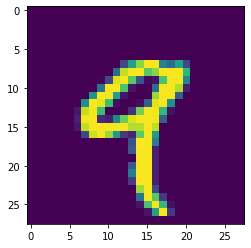

In [37]:
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
print(y_train[4])

3 <class 'numpy.uint8'>


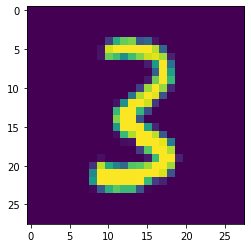

In [38]:
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

* 1번째 단계 : 3차원(이미지 2차원데이터)를 2차원(이미지 1차원데이터)로 만든다

* -1 은 한쪽 영역이 완료되면 나머지도 해준다

In [39]:
x_train = x_train.reshape(-1,28*28) / 255
x_train.shape

# 0~ 255: 색 분포표의 범위

(60000, 784)

In [40]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [41]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

y_train의 유니크 값을 확인. 모델에서 아웃풋 dense에 10을 넣어줌을 확인

In [42]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Apply model 

In [43]:
import tensorflow as tf

In [44]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer 

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* output layer 의 activation
  * unique가 3개 이상 일때는 activation은 softmax를 쓴다

  * 긍정과 부정 처럼 분류가 2개일(2진) 경우는 binary 라고 하는데 이때는 activation을 sigmoid를 쓴다

---
* loss 율
  * 연속형 -> loss = mae (절대값) : mean(abs(y_true - y_pred), axis=-1)

  * regression -> loss = mse (오차값) :  mean(square(y_true - y_pred), axis=-1)

  * binary classification -> loss = binary_crossentropy : f.keras.metrics.binary_crossentropy( y_true, y_pred, from_logits=False, label_smoothing=0)

  * over 3 classification -> loss = categorical_crossentropy (sparse_categorical_crossentropy) : tf.keras.metrics.categorical_crossentropy( y_true, y_pred, from_logits=False, label_smoothing=0 )

  * one-hot encoding 하기 싫을 때 -> loss = sparse_categorical_crossentropy : tf.keras.metrics.sparse_categorical_crossentropy( y_true, y_pred, from_logits=False, axis=-1)

  




# Training

In [45]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 2ms/step - loss: 0.3208 - acc: 0.9069 - val_loss: 0.1893 - val_acc: 0.9443
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1389 - acc: 0.9582 - val_loss: 0.1310 - val_acc: 0.9601
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0986 - acc: 0.9695 - val_loss: 0.1266 - val_acc: 0.9621
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0760 - acc: 0.9759 - val_loss: 0.1230 - val_acc: 0.9642
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0589 - acc: 0.9810 - val_loss: 0.1147 - val_acc: 0.9681
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0507 - acc: 0.9833 - val_loss: 0.1078 - val_acc: 0.9702
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0412 - acc: 0.9867 - val_loss: 0.1133 - val_acc: 0.9700
Epoch 8/100
1313/1313 [==============================] 

# Evaluation

In [46]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

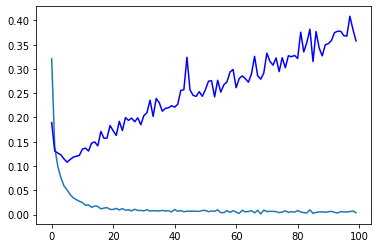

In [47]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

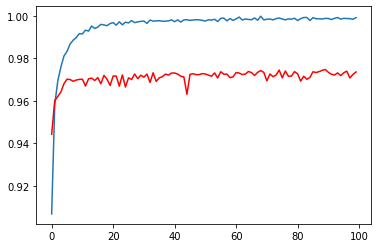

In [48]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# accuracy 변화 체크, 가로는 epochs

# Service

In [49]:
y_test[30]

3

In [50]:
pred = model.predict(x_test[30:31])
pred

# 30번째에 있는 것으로 테스트를 한다

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.4933514e-32, 0.0000000e+00, 3.5427437e-35,
        0.0000000e+00, 8.0455234e-33]], dtype=float32)

In [51]:
import numpy as np
# np.set_printoptions(precision = 8) # 생략하지 않고 array 출력

In [52]:
np.argmax(pred, axis=1)

array([3])

In [53]:
y_test[30]

3

In [56]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [57]:
model.save('./model_save01.h5')

In [59]:
# pickle로 세이브한 모델로 다시 교육 후 예측

model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [60]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 1.4933514e-32, 0.0000000e+00, 3.5427437e-35,
         0.0000000e+00, 8.0455234e-33]], dtype=float32), 3)

### argmax 연습

In [54]:
a = np.arange(6).reshape(2,3) + 10
print(a)

np.argmax(a) # 열 축에서 가장 큰 인덱스 값을 반환 (default)

[[10 11 12]
 [13 14 15]]


5

In [55]:
np.argmax(a, axis=1) # 행 축에서 가장 큰 인덱스 값을 반환

array([2, 2])